In [14]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
!wget https://i.pinimg.com/564x/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
path1="G:\\Datascience_experiments\\OCR_image_srivatsan\\receipt.jpg"
ground_truth_img= cv2.imread(path1, 0) 

In [6]:
import easyocr
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


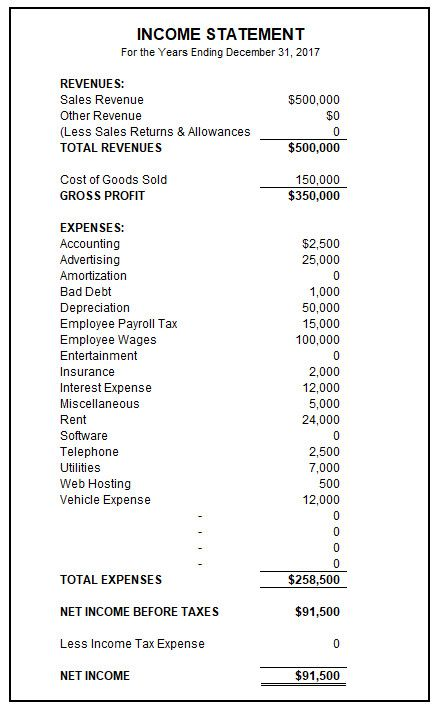

In [7]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open(path1)
im

# License plate recognition nicholas renotte you tube channel

In [8]:
path2="G:\\Datascience_experiments\\OCR_image_srivatsan\\nicholas_retonee_easyocr_licenseplate\\ANPRwithPython-main\\image2.jpg"

In [69]:
path3="G:\\Datascience_experiments\\OCR_image_srivatsan\\LicPlateImages\\11.png"

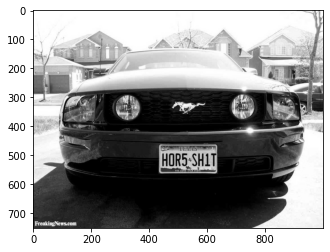

In [70]:
img = cv2.imread(path3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

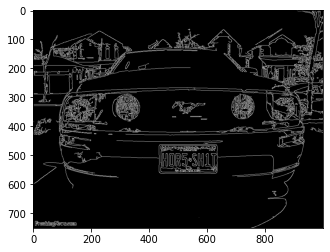

In [71]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [72]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [73]:
contours

[array([[[439, 462]],
 
        [[438, 463]],
 
        [[437, 463]],
 
        [[435, 465]],
 
        [[435, 466]],
 
        [[434, 467]],
 
        [[434, 498]],
 
        [[435, 499]],
 
        [[435, 532]],
 
        [[434, 533]],
 
        [[434, 556]],
 
        [[435, 557]],
 
        [[435, 558]],
 
        [[437, 560]],
 
        [[438, 560]],
 
        [[439, 561]],
 
        [[440, 561]],
 
        [[441, 562]],
 
        [[453, 562]],
 
        [[454, 561]],
 
        [[612, 561]],
 
        [[613, 562]],
 
        [[628, 562]],
 
        [[629, 561]],
 
        [[631, 561]],
 
        [[634, 558]],
 
        [[634, 555]],
 
        [[635, 554]],
 
        [[635, 544]],
 
        [[634, 543]],
 
        [[635, 542]],
 
        [[635, 541]],
 
        [[634, 540]],
 
        [[635, 539]],
 
        [[635, 521]],
 
        [[634, 520]],
 
        [[634, 519]],
 
        [[635, 518]],
 
        [[634, 517]],
 
        [[634, 514]],
 
        [[635, 513]],
 
        [[635, 4

In [74]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [75]:
location

array([[[434, 467]],

       [[441, 562]],

       [[634, 558]],

       [[632, 463]]], dtype=int32)

In [76]:
import numpy as np
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

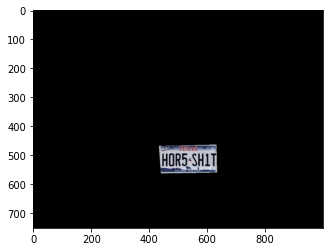

In [77]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [78]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

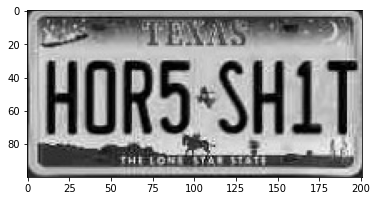

In [79]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [80]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 23], [201, 23], [201, 84], [3, 84]], 'HOR5 SHIT', 0.10547861456871033)]

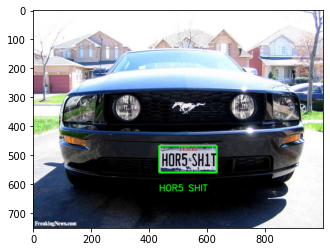

In [81]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))